# Importing Libraries and Datafile

In [1]:
import re
import sys
import json
import statsmodels.api as sm
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
plt.style.use('fivethirtyeight')

df = pd.read_csv('/Users/lookingglass/AnacondaProjects/GHI vs Other Factors 2.0 - All Combined.csv')

/Users/lookingglass/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Brief Glance at Data

In [2]:
df.describe()

,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Imports,Labor Force,CO2 Emissions,Livestock Production,Concessional Debt,...,"Reserves and related items (BoP, current US$)",Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)"
count,119.000000,1.190000e+02,1.190000e+02,1.190000e+02,116.000000,1.190000e+02,1.190000e+02,119.000000,119.000000,101.000000,...,1.150000e+02,1.190000e+02,119.000000,119.000000,97.000000,119.000000,116.000000,119.000000,119.000000,116.000000
mean,60.613445,7.957813e+05,5.143217e+07,4.633769e+10,0.027215,4.336989e+10,2.350187e+07,0.025804,76.523819,41.349524,...,2.020448e+09,4.528702e+06,96.101439,96.296283,1751.327965,79.003485,0.933728,43.258292,66.237037,1.455564
std,33.356856,1.978274e+06,1.742650e+08,1.900613e+11,0.022544,1.474639e+11,8.804025e+07,0.038984,20.498750,28.266413,...,1.130384e+10,1.305006e+07,6.722395,8.467885,2006.510123,17.371996,0.119021,19.826995,34.666878,2.093135
min,14.000000,2.040000e+03,5.919190e+05,2.000000e+07,0.000900,2.218000e+08,1.440000e+05,0.000332,45.984074,0.864200,...,-1.412363e+09,6.592593e+00,80.142273,77.873913,34.049457,33.792308,0.532683,0.530054,3.616690,0.000000
25%,30.000000,6.765500e+04,4.074138e+06,2.070500e+09,0.014975,3.482000e+09,1.684000e+06,0.003381,62.352037,17.287322,...,-5.070070e+07,2.769373e+05,91.989600,91.427087,400.993931,64.707609,0.873626,29.132057,33.384147,0.117623
50%,60.000000,2.410380e+05,1.190148e+07,7.000000e+09,0.021250,9.004000e+09,5.443000e+06,0.012117,69.692222,34.911004,...,7.534669e+07,8.865491e+05,95.240800,94.995217,1262.586495,82.911538,0.972909,42.105632,78.262732,0.625263
75%,89.000000,7.898285e+05,3.134300e+07,2.608000e+10,0.030600,2.667500e+10,1.330500e+07,0.034569,91.449554,65.676248,...,5.624459e+08,2.781870e+06,99.264704,99.998400,2206.794987,93.617308,1.012369,57.599940,98.235130,1.822314
max,119.000000,1.709824e+07,1.379303e+09,1.990000e+12,0.167200,1.495000e+12,8.071000e+08,0.283538,165.679630,93.103533,...,1.179880e+11,9.977335e+07,121.217200,143.599200,14698.981730,99.884615,1.126197,84.401387,100.000000,9.226586


In [3]:
df.columns

Index([u'Country Name', u'Global Hunger Index 2017', u'Land Mass ',
       u'Population', u'Export', u'GDP to Military', u'Imports',
       u'Labor Force', u'CO2 Emissions', u'Livestock Production',
       u'Concessional Debt', u'Forest Area', u'GPI Rank', u'Oil Production',
       u'Reserves and related items (BoP, current US$)',
       u'Land under cereal production (hectares)',
       u'Food production index (2004-2006 = 100)',
       u'Crop production index (2004-2006 = 100)',
       u'Electric power consumption (kWh per capita)',
       u'Improved water source (% of population with access)',
       u'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       u'Agricultural land (% of land area)',
       u'Access to electricity (% of population)',
       u'Droughts, floods, extreme temperatures (% of population, average 1990-2009)'],
      dtype='object')

# Review of Nulls

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 24 columns):
Country Name                                                                   119 non-null object
Global Hunger Index 2017                                                       119 non-null int64
Land Mass                                                                      119 non-null int64
Population                                                                     119 non-null int64
Export                                                                         119 non-null int64
GDP to Military                                                                116 non-null float64
Imports                                                                        119 non-null int64
Labor Force                                                                    119 non-null int64
CO2 Emissions                                                                  119 non-null float64
Livestoc

# Dropping Nulls

In [5]:
df2=df.dropna()

# Review of Data Left After Removing Nulls

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 113
Data columns (total 24 columns):
Country Name                                                                   71 non-null object
Global Hunger Index 2017                                                       71 non-null int64
Land Mass                                                                      71 non-null int64
Population                                                                     71 non-null int64
Export                                                                         71 non-null int64
GDP to Military                                                                71 non-null float64
Imports                                                                        71 non-null int64
Labor Force                                                                    71 non-null int64
CO2 Emissions                                                                  71 non-null float64
Livestock Producti

In [7]:
df2.head()

,Country Name,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Imports,Labor Force,CO2 Emissions,Livestock Production,...,"Reserves and related items (BoP, current US$)",Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)"
0,Turkey,14,783562,80845215,150200000000,0.0335,191000000000,30550000,0.024230,81.633333,...,3.463522e+09,1.295917e+07,97.505600,94.417600,1828.815119,93.823077,0.868815,51.622058,95.151783,0.136563
2,Ukraine,14,603550,44033874,33560000000,0.0286,40570000000,18040000,0.072069,108.103478,...,-8.683857e+07,1.360731e+07,106.775652,102.205652,3421.743956,97.090909,0.997913,71.581526,96.514517,0.269239
3,Belarus,14,207600,9549747,22980000000,0.0156,25570000000,4381000,0.062831,108.345652,...,-2.594468e+07,2.396696e+06,104.179565,91.222174,3362.265890,99.553846,0.984776,44.608011,100.000000,0.021959
11,Montenegro,14,13812,642550,370200000,0.0179,1982000000,263200,0.037543,81.447778,...,5.641430e+07,1.981818e+03,86.791111,91.814444,5639.281239,98.244444,1.012871,31.813011,100.000000,0.012174
14,Romania,15,238391,21529967,57720000000,0.0254,67940000000,8979000,0.058647,95.622222,...,1.461458e+09,5.642454e+06,93.959600,87.325200,2368.159008,88.146154,1.001731,62.568468,100.000000,0.084971


In [8]:
df2.shape

(71, 24)

In [9]:
df2.describe()

,Global Hunger Index 2017,Land Mass,Population,Export,GDP to Military,Imports,Labor Force,CO2 Emissions,Livestock Production,Concessional Debt,...,"Reserves and related items (BoP, current US$)",Land under cereal production (hectares),Food production index (2004-2006 = 100),Crop production index (2004-2006 = 100),Electric power consumption (kWh per capita),Improved water source (% of population with access),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Agricultural land (% of land area),Access to electricity (% of population),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)"
count,71.000000,7.100000e+01,7.100000e+01,7.100000e+01,71.00000,7.100000e+01,7.100000e+01,71.000000,71.000000,71.000000,...,7.100000e+01,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,55.521127,1.101653e+06,7.849129e+07,6.820111e+10,0.02559,6.386468e+10,3.613476e+07,0.021074,74.060447,33.962375,...,2.908077e+09,6.997076e+06,95.427312,95.386918,1331.261041,80.677138,0.948083,43.784441,73.759738,1.384024
std,29.033901,2.496184e+06,2.219111e+08,2.430058e+11,0.01595,1.876818e+11,1.124543e+08,0.024985,20.971300,26.423250,...,1.421177e+10,1.646367e+07,6.359288,8.131679,1338.160941,16.252174,0.099173,17.309216,29.486121,1.939073
min,14.000000,2.040000e+03,6.425500e+05,1.636000e+08,0.00230,1.981000e+09,2.632000e+05,0.000543,49.458704,0.864200,...,-1.412363e+09,1.968519e+02,80.142273,80.162273,34.049457,33.792308,0.668543,3.411848,8.741479,0.000000
25%,31.000000,1.098840e+05,7.106267e+06,3.508500e+09,0.01555,5.855500e+09,2.773500e+06,0.004866,60.277685,11.807522,...,-2.648010e+07,5.205741e+05,91.989600,91.050087,285.289574,72.727227,0.899293,31.098796,47.670515,0.134632
50%,53.000000,3.312100e+05,2.152997e+07,1.058000e+10,0.02070,1.676000e+10,8.805000e+06,0.013445,65.773333,27.509304,...,1.025068e+08,1.280736e+06,94.436800,94.012400,943.970821,83.165385,0.978996,43.380212,86.326677,0.597670
75%,75.500000,1.050016e+06,5.082473e+07,3.385000e+10,0.03085,4.109500e+10,2.309000e+07,0.027952,82.339352,56.797615,...,8.388565e+08,7.984002e+06,97.897096,99.757800,1851.296795,93.707692,1.013513,54.941857,97.987035,1.547613
max,114.000000,1.709824e+07,1.379303e+09,1.990000e+12,0.09250,1.495000e+12,8.071000e+08,0.119539,165.679630,93.103533,...,1.179880e+11,9.977335e+07,121.217200,143.599200,5813.231824,99.676923,1.104424,79.823854,100.000000,7.950971


# Multiple Regression Analysis

In [31]:
y = df2["Global Hunger Index 2017"]
x = df2[['Land Mass ','Population', 'Export', 'GDP to Military', 'Imports',
       'Labor Force', 'CO2 Emissions', 'Livestock Production',
       'Concessional Debt', 'Forest Area', 'GPI Rank', 'Oil Production',
       'Reserves and related items (BoP, current US$)',
       'Land under cereal production (hectares)',
       'Food production index (2004-2006 = 100)',
       'Crop production index (2004-2006 = 100)',
       'Electric power consumption (kWh per capita)',
       'Improved water source (% of population with access)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agricultural land (% of land area)',
       'Access to electricity (% of population)', 'Droughts, floods, extreme temperatures (% of population, average 1990-2009)']]

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Global Hunger Index 2017   R-squared:                       0.965
Model:                                  OLS   Adj. R-squared:                  0.950
Method:                       Least Squares   F-statistic:                     62.33
Date:                      Thu, 05 Apr 2018   Prob (F-statistic):           1.67e-28
Time:                              20:41:40   Log-Likelihood:                -274.89
No. Observations:                        71   AIC:                             593.8
Df Residuals:                            49   BIC:                             643.6
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Land Mass                                                                    2.754e-06   3.48e-06      0.791      0.433   -4.24e-06    9.75e-06
Population                                                                   3.973e-07   1.94e-07      2.053      0.045    8.34e-09    7.86e-07
Export                                                                       4.808e-10   1.79e-10      2.690      0.010    1.22e-10     8.4e-10
GDP to Military                                                               -19.6266    124.324     -0.158      0.875    -269.464     230.211
Imports                                                                     -4.822e-10    1.7e-10     -2.843      0.007   -8.23e-10   -1.41e-10
Labor Force                                                                 -5.562e-07   4.47e-07     -1.245      0.219   -1.45e-06    3.42e-07
CO2 Emissions                                                                -192.2713    175.910     -1.093      0.280    -545.776     161.234
Livestock Production                                                           -0.3235      0.170     -1.903      0.063      -0.665       0.018
Concessional Debt                                                               0.1742      0.116      1.496      0.141      -0.060       0.408
Forest Area                                                                  4.195e-05   3.78e-05      1.109      0.273   -3.41e-05       0.000
GPI Rank                                                                       17.6058      5.806      3.032      0.004       5.938      29.274
Oil Production                                                              -2.991e-06   4.21e-06     -0.711      0.480   -1.14e-05    5.46e-06
Reserves and related items (BoP, current US$)                               -2.387e-09   1.38e-09     -1.731      0.090   -5.16e-09    3.84e-10
Land under cereal production (hectares)                                     -1.193e-06   8.93e-07     -1.336      0.188   -2.99e-06    6.01e-07
Food production index (2004-2006 = 100)                                         1.8996      0.587      3.234      0.002       0.719       3.080
Crop production index (2004-2006 = 100)                                        -0.8344      0.443     -1.883      0.066      -1.725       0.056
Electric power consumption (kWh per capita)                                    -0.0011      0.003     -0.329      0.743      -0.008       0.006
Improved water source (% of population with access)                            -0.5252      0.246     -2.136      0.038      -1.019      

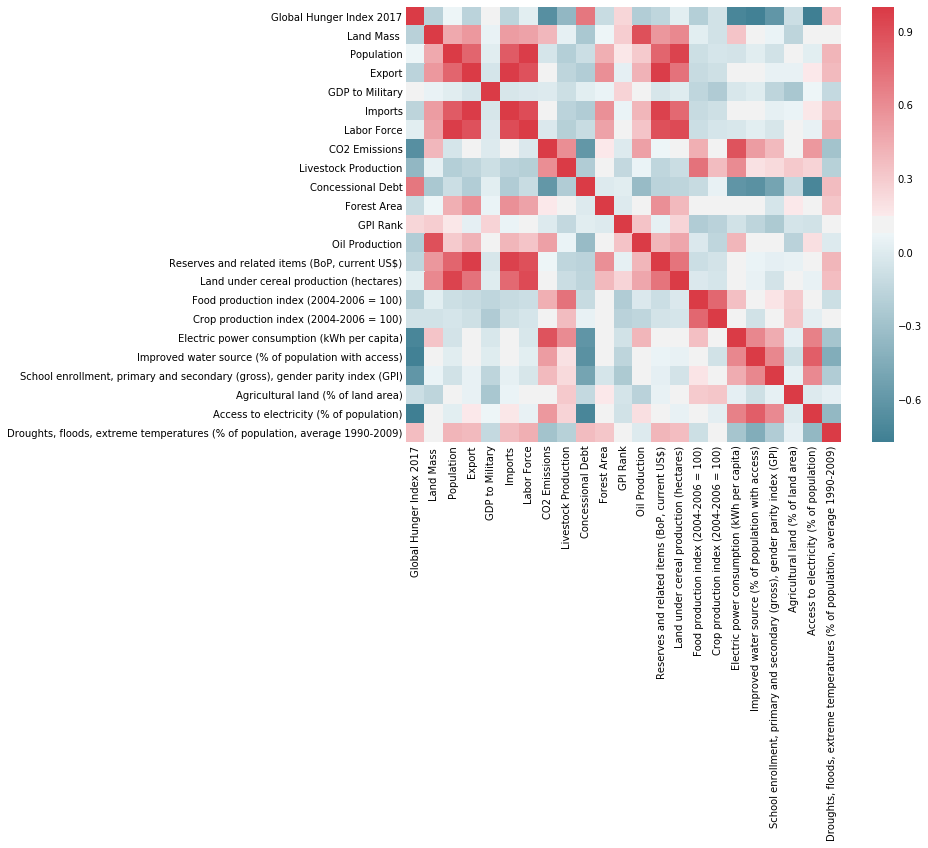

In [20]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


# Search for multicollinearity among narrowed list of indicators

## Indicators with lowest p-values
* Export<br>
* Imports<br>
* GPI Rank<br>
* Population<br>
* Food Production Index (2004-2006 = 100)<br>
* Improved water source (% of population with access)

## Creating a subset to identify and analyze the six indicators

In [32]:
df3 = df2[['Export', 'Imports', 'Population', 'GPI Rank','Food production index (2004-2006 = 100)',
'Improved water source (% of population with access)']]

In [33]:
df3.head()

,Export,Imports,Population,GPI Rank,Food production index (2004-2006 = 100),Improved water source (% of population with access)
0,150200000000,191000000000,80845215,2.48,97.505600,93.823077
2,33560000000,40570000000,44033874,2.43,106.775652,97.090909
3,22980000000,25570000000,9549747,2.15,104.179565,99.553846
11,370200000,1982000000,642550,1.97,86.791111,98.244444
14,57720000000,67940000000,21529967,1.63,93.959600,88.146154


In [34]:
df3.describe()

,Export,Imports,Population,GPI Rank,Food production index (2004-2006 = 100),Improved water source (% of population with access)
count,7.100000e+01,7.100000e+01,7.100000e+01,71.000000,71.000000,71.000000
mean,6.820111e+10,6.386468e+10,7.849129e+07,2.170282,95.427312,80.677138
std,2.430058e+11,1.876818e+11,2.219111e+08,0.332956,6.359288,16.252174
min,1.636000e+08,1.981000e+09,6.425500e+05,1.520000,80.142273,33.792308
25%,3.508500e+09,5.855500e+09,7.106267e+06,1.940000,91.989600,72.727227
50%,1.058000e+10,1.676000e+10,2.152997e+07,2.140000,94.436800,83.165385
75%,3.385000e+10,4.109500e+10,5.082473e+07,2.350000,97.897096,93.707692
max,1.990000e+12,1.495000e+12,1.379303e+09,3.220000,121.217200,99.676923


## Search for multicollinearity 

In [35]:
df3.corr()
# indicators with more than one output above 0.15 are considered collinear

,Export,Imports,Population,GPI Rank,Food production index (2004-2006 = 100),Improved water source (% of population with access)
Export,1.000000,0.990431,0.786038,0.037761,-0.108855,0.089757
Imports,0.990431,1.000000,0.835583,0.060207,-0.110418,0.106967
Population,0.786038,0.835583,1.000000,0.163705,-0.083384,0.012424
GPI Rank,0.037761,0.060207,0.163705,1.000000,-0.213514,-0.154417
Food production index (2004-2006 = 100),-0.108855,-0.110418,-0.083384,-0.213514,1.000000,0.125796
Improved water source (% of population with access),0.089757,0.106967,0.012424,-0.154417,0.125796,1.000000


In [38]:
y = df2["Export"]
x = df2[["Imports", "Population"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Export   R-squared:                  -11717.988
Model:                            OLS   Adj. R-squared:             -12057.668
Method:                 Least Squares   F-statistic:                    -34.50
Date:                Thu, 05 Apr 2018   Prob (F-statistic):               1.00
Time:                        21:15:06   Log-Likelihood:                -1813.2
No. Observations:                  71   AIC:                             3630.
Df Residuals:                      69   BIC:                             3635.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Imports        1.4233      0.035     40.693      0.000       1.354       1.493
Population  -161.3056     29.457     -5.476      0.000    -220.070    -102.541
==============================================================================
Omnibus:                       58.361   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.013
Skew:                          -2.181   Prob(JB):                    1.17e-103
Kurtosis:                      14.883   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

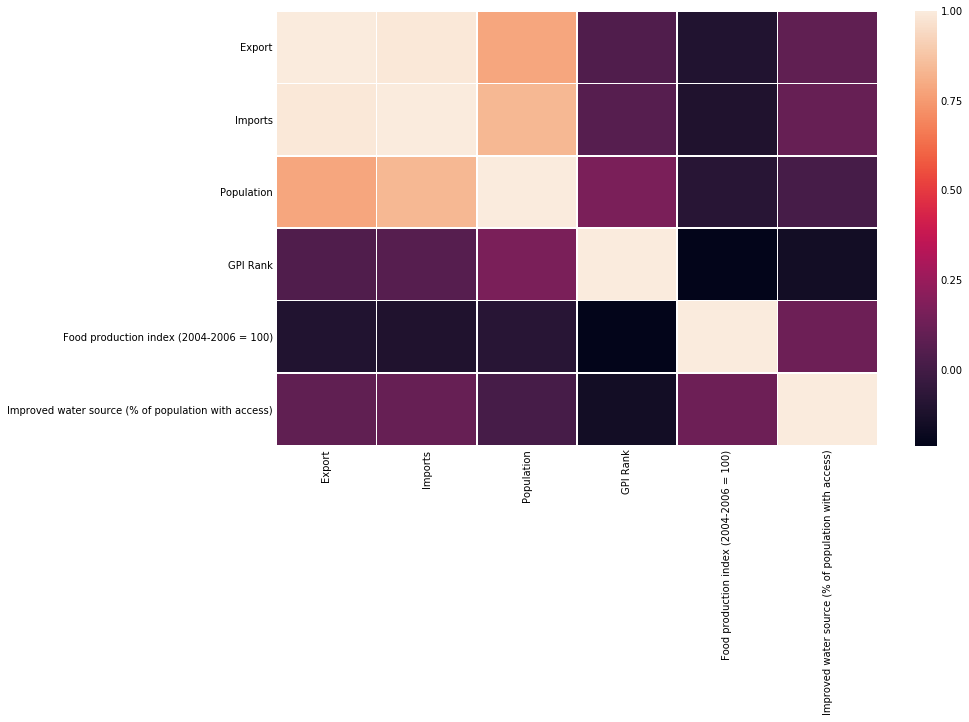

In [46]:
sns.heatmap(df3.corr(), annot=False, linewidths= .5) 
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show();

# Observations

Removing collinear indicators were left with the following: 
* Global Peace Index -- 0.004
* Food Production Index (2004-2006 = 100) -- 0.002
* Improved water source (% of population with access) -- 0.038

# Possible Confounders

In [48]:
y = df2["Improved water source (% of population with access)"]
x = df2[["Droughts, floods, extreme temperatures (% of population, average 1990-2009)"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Improved water source (% of population with access)   R-squared:                       0.252
Model:                                                             OLS   Adj. R-squared:                  0.241
Method:                                                  Least Squares   F-statistic:                     23.57
Date:                                                 Thu, 05 Apr 2018   Prob (F-statistic):           7.07e-06
Time:                                                         21:26:39   Log-Likelihood:                -403.56
No. Observations:                                                   71   AIC:                             809.1
Df Residuals:                                                       70   BIC:                             811.4
Df Model:                                                            1                                         
Covariance Type:                                             nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Droughts, floods, extreme temperatures (% of population, average 1990-2009)    17.4150      3.587      4.855      0.000      10.261      24.569
==============================================================================
Omnibus:                       26.140   Durbin-Watson:                   0.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.162
Skew:                          -1.548   Prob(JB):                     5.17e-09
Kurtosis:                       4.821   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
y = df2["Food production index (2004-2006 = 100)"]
x = df2[["Improved water source (% of population with access)"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Food production index (2004-2006 = 100)   R-squared:                       0.961
Model:                                                 OLS   Adj. R-squared:                  0.960
Method:                                      Least Squares   F-statistic:                     1703.
Date:                                     Thu, 05 Apr 2018   Prob (F-statistic):           7.18e-51
Time:                                             21:34:16   Log-Likelihood:                -309.80
No. Observations:                                       71   AIC:                             621.6
Df Residuals:                                           70   BIC:                             623.9
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Improved water source (% of population with access)     1.1392      0.028     41.273      0.000       1.084       1.194
==============================================================================
Omnibus:                       13.951   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.302
Skew:                           1.092   Prob(JB):                     0.000476
Kurtosis:                       3.638   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

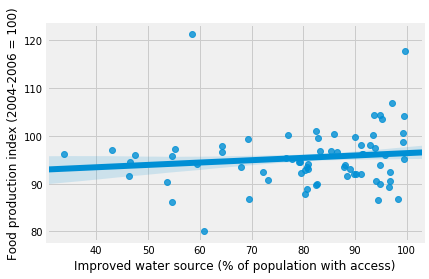

In [55]:
ax = sns.regplot(y='Food production index (2004-2006 = 100)', x='Improved water source (% of population with access)', ci=68, data=df3)

In [51]:
y = df2['GPI Rank']
x = df2[["Food production index (2004-2006 = 100)"]]
model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               GPI Rank   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     2179.
Date:                Thu, 05 Apr 2018   Prob (F-statistic):           1.75e-54
Time:                        21:35:58   Log-Likelihood:                -33.396
No. Observations:                  71   AIC:                             68.79
Df Residuals:                      70   BIC:                             71.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Food production index (2004-2006 = 100)     0.0226      0.000     46.681      0.000       0.022       0.024
==============================================================================
Omnibus:                        9.516   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               12.600
Skew:                           0.535   Prob(JB):                      0.00184
Kurtosis:                       4.764   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

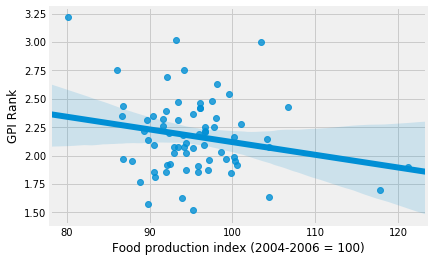

In [56]:
ax = sns.regplot(x='Food production index (2004-2006 = 100)', y='GPI Rank', ci=95, data=df3)